#### https://www.kaggle.com/amar09/regression-algorithms-using-scikit-learn

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
data = pd.read_csv('50_Startups.csv')

In [4]:
data.sample(n=3)

,R&D Spend,Administration,Marketing Spend,State,Profit
29,65605.48,153032.06,107138.38,New York,101004.64
12,93863.75,127320.38,249839.44,Florida,141585.52
45,1000.23,124153.04,1903.93,New York,64926.08


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [6]:
x = data.iloc[:, :-1]

In [7]:
y = data.iloc[:,  -1]

In [8]:
type(x)

pandas.core.frame.DataFrame

In [9]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [10]:
x = data.iloc[:, :-1].values

In [11]:
type(x)

numpy.ndarray

In [12]:
x[:5]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida']], dtype=object)

In [13]:
y = data.iloc[:,  -1].values # converted to array

In [14]:
y[:5] # converted to array

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94])

In [15]:
labelencoder = LabelEncoder()

In [16]:
x[:, 3] = labelencoder.fit_transform(x[:, 3])

In [17]:
x[:2] # last column has now been encoded

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0]], dtype=object)

In [18]:
list(labelencoder.classes_)

['California', 'Florida', 'New York']

In [20]:
name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))

In [21]:
print(name_mapping)

{'California': 0, 'Florida': 1, 'New York': 2}


In [22]:
onehotencoder = OneHotEncoder()

In [24]:
x = onehotencoder.fit_transform(x).toarray()

In [25]:
type(x)

numpy.ndarray

In [26]:
x[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.,

In [27]:
x = x[:, 1:]

In [28]:
x[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 1.]])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [30]:
model = LinearRegression()

In [31]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_predicted = model.predict(x_test)

In [33]:
r2_score(y_predicted, y_test)

-35.71176279379386

In [34]:
# Polynomial model

In [35]:
data = pd.read_csv('Position_Salaries.csv')

In [36]:
data.sample(n=3)

,Position,Level,Salary
1,Junior Consultant,2,50000
3,Manager,4,80000
8,C-level,9,500000


In [38]:
X = data.iloc[:,1:2].values
y = data.iloc[:,-1].values

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
model = PolynomialFeatures(degree = 2)

In [42]:
X_poly = model.fit_transform(X)

In [43]:
type(X_poly)

numpy.ndarray

In [44]:
X_poly[:3]

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [45]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

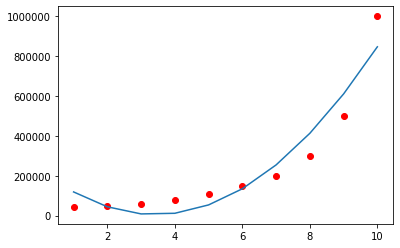

In [48]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X, poly_reg_model.predict(model.fit_transform(X)), label='Polynmial regressor fit line')